## Simple Linear Regression

Import all the libraries that we need in this module...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the dataset to perform simple linear regression

In [2]:
df_01 = pd.read_excel("height-weight.xlsx")

In [3]:
df_01.head()

,Weight,Height
0,70,175
1,75,185
2,65,165
3,80,180
4,74,182


In [4]:
x = df_01[["Weight"]]
y = df_01[["Height"]]

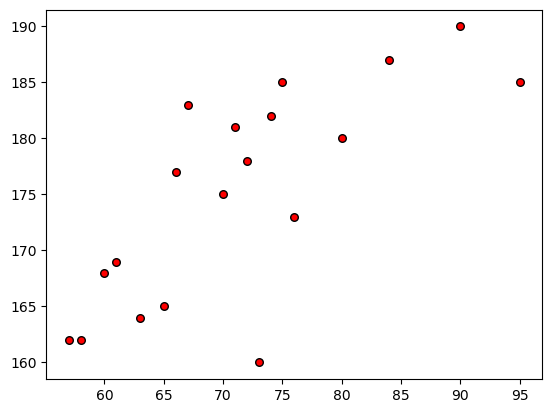

In [5]:
plt.scatter(x, y, c = 'red', s = 30, edgecolors = 'black')

### Step-01: Import train_test_split from sklearn.model_selection

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
x_train.shape

(15, 1)

In [9]:
y_train.shape

(15, 1)

In [10]:
x_test.shape

(4, 1)

In [11]:
y_test.shape

(4, 1)

In [12]:
x_train.head()

,Weight
9,84
11,95
7,67
15,66
1,75


In [13]:
x_test.head()

,Weight
16,73
0,70
3,80
5,60


### Step-02: Import StandardScaler from sklearn.preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train

array([[ 1.14553218],
       [ 2.16173008],
       [-0.42495549],
       [-0.51733711],
       [ 0.31409753],
       [ 0.40647916],
       [-1.34877176],
       [-0.97924525],
       [-1.25639013],
       [-0.79448199],
       [-0.60971874],
       [ 1.69982194],
       [-0.05542898],
       [ 0.03695265],
       [ 0.22171591]])

In [18]:
x_test

array([[ 0.12933428],
       [-0.1478106 ],
       [ 0.77600567],
       [-1.07162688]])

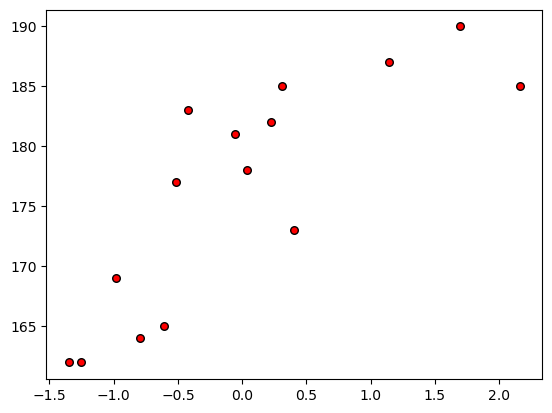

In [19]:
plt.scatter(x_train, y_train, c = 'red', s = 30, edgecolors = 'black')

### Step-03: Import LinearRegression from sklearn.linear_model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression()

In [22]:
regressor.fit(x_train, y_train)

LinearRegression()

In [23]:
print("Intercept: " + str(regressor.intercept_))
print("Coefficient: " + str(regressor.coef_))

Intercept: [176.2]
Coefficient: [[7.64427171]]


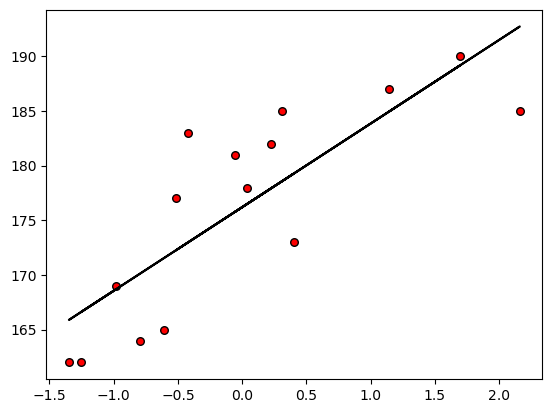

In [24]:
plt.scatter(x_train, y_train, c = 'red', s = 30, edgecolors = 'black')
plt.plot(x_train, regressor.predict(x_train), c = 'black')

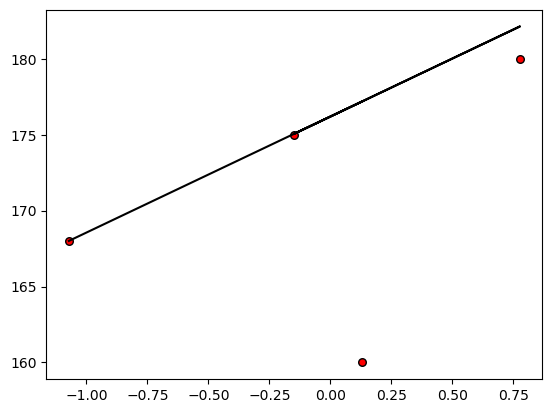

In [44]:
plt.scatter(x_test, y_test, c = 'red', s = 30, edgecolors = 'black')
plt.plot(x_test, regressor.predict(x_test), c = 'black')

### Step-04: Import mean_squared_error, mean_absolute_error from sklearn.metrics

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
y_pred_test = regressor.predict(x_test)

In [37]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("MSE: " + str(mse))
print("MAE: " + str(mae))
print("RMSE: " + str(rmse))

MSE: 75.00016202474556
MAE: 4.849738279472
RMSE: 8.660263392342381


### Step-05: Import r2_score from sklearn.metrics to calculate R squared value and Adjusted R squared value

In [38]:
from sklearn.metrics import r2_score

In [48]:
y_test

,Height
16,160
0,175
3,180
5,168


In [65]:
y_test.mean()

Height    170.75
dtype: float64

In [64]:
y_test.var()

Height    75.583333
dtype: float64

In [56]:
x_test

array([[ 0.12933428],
       [-0.1478106 ],
       [ 0.77600567],
       [-1.07162688]])

In [49]:
y_pred_test

array([[177.18866636],
       [175.07009558],
       [182.13199818],
       [168.00819299]])

In [60]:
score = r2_score(y_test, y_pred_test)

In [61]:
score

-0.32304585710686773

In [62]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

-0.9845687856603016

### New Data Points - Weights

In [66]:
scaled_weight = scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
print("Scaled Weight: " + str(scaled_weight))

Scaled Weight: [[0.77600567]]


In [68]:
regressor.predict(scaled_weight)

array([[182.13199818]])

### Asumptions - Linear Regression

Assumptions for a great model:
1. The actual o/p values and the predicted o/p values should be linearly distributed.
2. The residuals must be normally distributed.
3. The predicted o/p values and the residuals must be uniformly distributed.

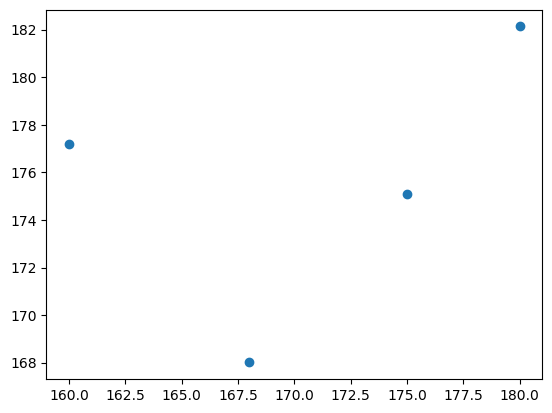

In [69]:
plt.scatter(y_test, y_pred_test)

In [70]:
residuals = y_test - y_pred_test

In [71]:
residuals

,Height
16,-17.188666
0,-0.070096
3,-2.131998
5,-0.008193


/tmp/ipykernel_1531/2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<AxesSubplot: ylabel='Density'>

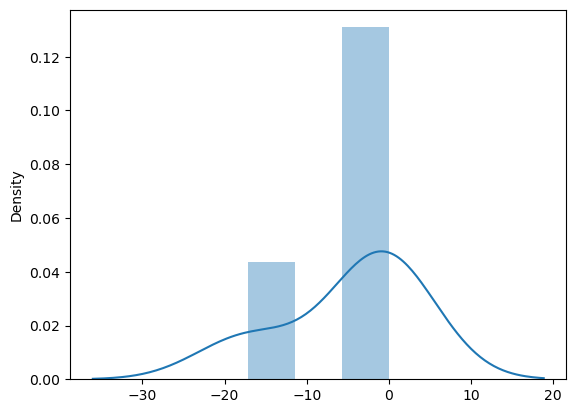

In [75]:
sns.distplot(residuals)

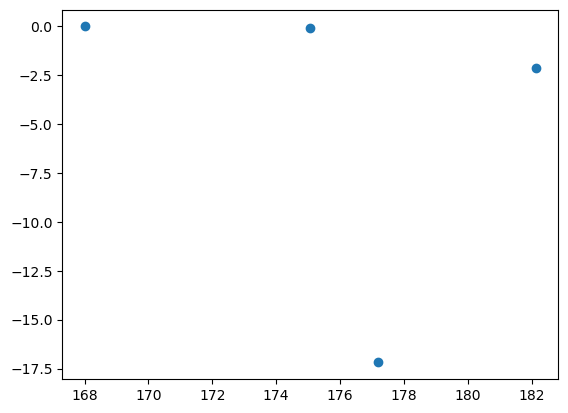

In [76]:
plt.scatter(y_pred_test, residuals)